In [1]:
S0 = 100.
r = 0.04
sigma = 0.02

In [2]:
import numpy as np

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# analytical formula for stock price
stockprice = lambda S0, r, sigma, t, z: S0*np.exp((r-0.5*sigma*sigma)*t+sigma*z*np.sqrt(t))

In [13]:
tarray = np.arange(100)/10.
zarray = np.random.normal(size=100)
sarray = stockprice(S0, r, sigma, tarray, zarray)

stockprice(S0, r, sigma, tarray, zarray) 

array([100.        , 101.84358273, 100.80369057, 101.70122942,
       100.64846783, 102.58575251, 101.64776535, 100.77723517,
       104.28893938, 104.19440071, 101.77119129, 105.00161559,
       103.81926331, 102.75847112, 102.00751093, 105.99604844,
       108.89875419, 106.91652885, 110.07461395, 104.21258176,
       109.85239515, 110.05350554, 107.38347791, 111.00746473,
       108.17484009, 107.39741999, 102.85053929, 113.73675532,
       114.04604934, 109.57015772, 110.7983589 , 110.3106263 ,
       115.22643104, 111.69540279, 119.67763631, 119.05864808,
       117.44693271, 120.03819462, 117.72715   , 112.95573715,
       118.31549938, 119.75957785, 114.64931354, 116.47587568,
       112.96847147, 116.46795877, 117.92924468, 117.66275359,
       120.12751107, 121.40035003, 117.17111795, 116.44965808,
       114.93458514, 123.15325747, 132.78527106, 128.88314945,
       133.96073336, 129.71734575, 122.47090571, 121.37155484,
       131.09055366, 130.74486154, 127.46601646, 118.57

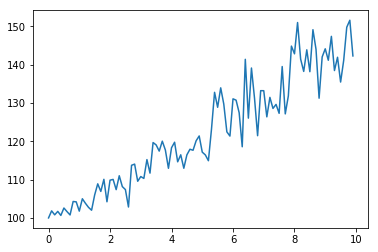

In [14]:
plt.plot(tarray, sarray)

In [16]:
from pymc3 import Model, Normal, HalfNormal

stockprice_model = Model()

with stockprice_model:
    rnd_S0 = Normal('rnd_S0', mu=100, sd=10)
    rnd_r = HalfNormal('rnd_r', sd=2)
    rnd_sigma = HalfNormal('rnd_sigma', sd=2)
    
    # formula
    mu_observed_S = stockprice(rnd_S0, rnd_r, rnd_sigma, tarray, 0)
    
    # model
    observed_S = Normal('observed_S', mu=mu_observed_S, sd=rnd_sigma, observed=sarray)

In [17]:
from pymc3 import NUTS, sample, find_MAP
from scipy.optimize import fmin_powell

with stockprice_model:
    start = find_MAP(fmin=fmin_powell)
    step = NUTS(scaling=start)
    trace = sample(2000, step, start=start)

/Users/stephenhky/anaconda/lib/python2.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/Users/stephenhky/anaconda/lib/python2.7/site-packages/pymc3/tuning/starting.py:102: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = -inf:   2%|▏         | 110/5000 [00:00<00:02, 2164.07it/s]   

Optimization terminated successfully.
         Current function value: -10000000000000000159028911097599180468360808563945281389781327557747838772170381060813469985856815104.000000
         Iterations: 2
         Function evaluations: 111


logp = -inf:   2%|▏         | 111/5000 [00:00<00:31, 155.57it/s] 


PositiveDefiniteError: Scaling is not positive definite: Simple check failed. Diagonal contains negatives. Check indexes [0].